In [23]:
# Dependencies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)

In [5]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()
print(june_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date', 'june temps'])
june_df

,date,june temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,june temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)

In [9]:
# 7. Convert the December temperatures to a list.
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
print(december_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_results, columns=['date', 'dec temps'])
december_df

,date,dec temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,dec temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
june_summ = june_df.describe()
dec_summ = december_df.describe()

summary_df = june_summ.merge(dec_summ, left_index=True, right_index=True)
summary_df

,june temps,dec temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


Text(0.5, 0, 'Month')

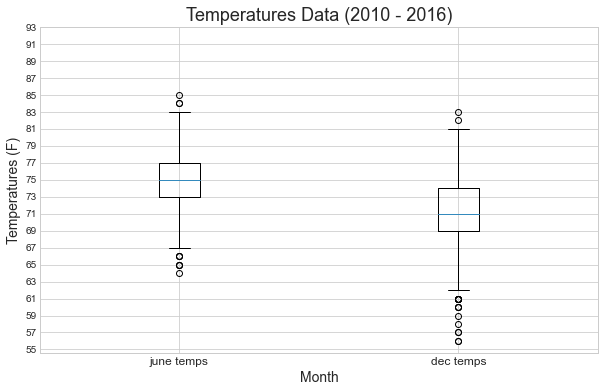

In [40]:
#Style
plt.style.use('seaborn-whitegrid')

#Plot the Box & Whiskers
x_labels = ["june temps", "dec temps"]
temps = [june_df["june temps"], december_df["dec temps"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)


#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(55, 95, step=2.0))
ax.set_title('Temperatures Data (2010 - 2016)',fontsize=18)
ax.set_ylabel('Temperatures (F)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

In [27]:
results_prcp_june =[]
results_prcp_june = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

june_prcp_df = pd.DataFrame(results_prcp_june, columns = ['date', 'June prcp'])
june_prcp_df.set_index(june_prcp_df['date'], inplace=True)

In [28]:
june_prcp_df.describe()

,June prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [34]:
#June Rain by Year
june_prcp_index_df = june_prcp_df.set_index(june_prcp_df['date'], inplace=False)

#Sort the dates
june_prcp_index_df = june_prcp_index_df.sort_index()

#Set the index date to the date datatype
june_prcp_index_df.index = pd.to_datetime(june_prcp_index_df.index)

#Group by year
june_prcp_index_df_year = june_prcp_index_df.resample("Y").mean()
june_prcp_index_df_year

,June prcp
date,
2010-12-31,0.042241
2011-12-31,0.240142
2012-12-31,0.097062
2013-12-31,0.144195
2014-12-31,0.124372
2015-12-31,0.125160
2016-12-31,0.212312
2017-12-31,0.120000


In [29]:
results_prcp_december =[]
results_prcp_december = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

december_prcp_df = pd.DataFrame(results_prcp_december, columns = ['date', 'December prcp'])
december_prcp_df.set_index(december_prcp_df['date'], inplace=True)

In [30]:
december_prcp_df.describe()

,December prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [36]:
#December Rain group by Year
#Set index to date
dec_prcp_index_df = december_prcp_df.set_index(december_prcp_df['date'], inplace=False)

#Sort the dates
dec_prcp_index_df = dec_prcp_index_df.sort_index()

#Set the index date to the date datatype
dec_prcp_index_df.index = pd.to_datetime(dec_prcp_index_df.index)

#Group by year
dec_prcp_index_df_year = dec_prcp_index_df.resample("Y").mean()
dec_prcp_index_df_year

,December prcp
date,
2010-12-31,0.459087
2011-12-31,0.201581
2012-12-31,0.089604
2013-12-31,0.169014
2014-12-31,0.188439
2015-12-31,0.169506
2016-12-31,0.199494


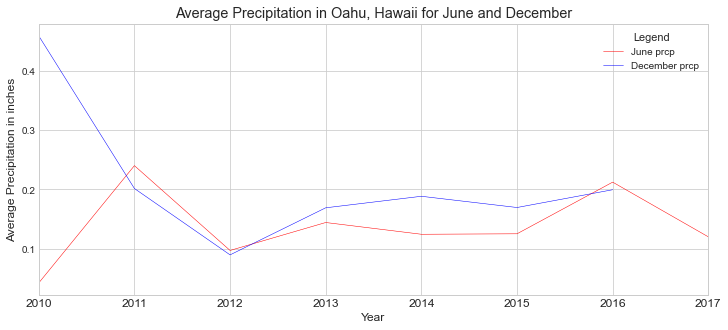

In [41]:
#June and December - graph - by year
#Style
plt.style.use('seaborn-whitegrid')

#Plot the graph
ax = june_prcp_index_df_year.plot(c='red', linewidth=0.5)
dec_prcp_index_df_year.plot(ax=ax, c='blue', figsize=(12, 5), linewidth=0.5)

#Labels
ax.set_xlabel('Year')
ax.set_ylabel("Average Precipitation in inches")
ax.set_title("Average Precipitation in Oahu, Hawaii for June and December")

#Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

#Plot the legend
legend = plt.legend(fontsize="10", mode="Expanded",
         loc="best", title="Legend")
legend.get_title().set_fontsize(11)
plt.show()